In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
#ライブラリの読み込み
import os
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

nb_epoch = 50
result_dir = 'results'

Using TensorFlow backend.


In [0]:
#学習モデル保存関数
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [6]:
#モデル作成
#optimizerはadamを設定

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [7]:
#データ準備
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [8]:
#モデル実行
history = model.fit_generator(
    train_generator,
    nb_epoch=nb_epoch,
    validation_data=validation_generator)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., epochs=50)`
  after removing the cwd from sys.path.


Epoch 1/50
438/438 [==============================] - 145s 330ms/step - loss: 0.6608 - acc: 0.5957 - val_loss: 0.6485 - val_acc: 0.6095
Epoch 2/50
264/438 [=================>............] - ETA: 47s - loss: 0.5844 - acc: 0.6919438/438 [==============================] - 142s 325ms/step - loss: 0.5769 - acc: 0.6990 - val_loss: 0.5114 - val_acc: 0.7502
Epoch 3/50
397/438 [==========================>...] - ETA: 11s - loss: 0.5203 - acc: 0.7455438/438 [==============================] - 142s 325ms/step - loss: 0.5198 - acc: 0.7466 - val_loss: 0.4683 - val_acc: 0.7797
Epoch 4/50
438/438 [==============================] - 142s 325ms/step - loss: 0.4824 - acc: 0.7721 - val_loss: 0.4805 - val_acc: 0.7710
Epoch 5/50
  5/438 [..............................] - ETA: 26s - loss: 0.4733 - acc: 0.7625438/438 [==============================] - 141s 323ms/step - loss: 0.4600 - acc: 0.7884 - val_loss: 0.4243 - val_acc: 0.8087
Epoch 6/50
300/438 [===================>..........] - ETA: 37s - loss: 0.4349 - 

In [0]:
#結果保存
model.save_weights(os.path.join(result_dir, 'base_keras.h5'))
save_history(history, os.path.join(result_dir, 'history_base_keras.txt'))

In [0]:
学習モデルの結果
loss: 0.1772
acc: 0.9307

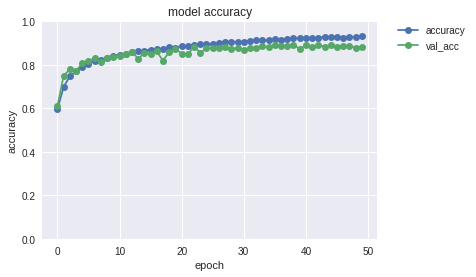

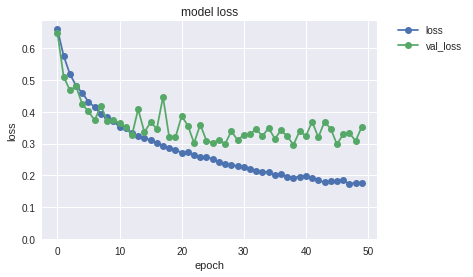

In [11]:
#結果をグラフ表示
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
def plot_history(history):
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(0, 1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(ymin=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
plot_history(history)

In [12]:
#テスト用データ準備
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1556 images belonging to 2 classes.


In [13]:
#テストの結果を表示
score=model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])


 test loss: 0.35518179140544487

 test_acc: 0.8740359900236743
